## Import and Installations

In [1]:
# Data Handling Toolbox
import numpy as np
import matplotlib.pyplot as plt

# Deep Learning Toolbox
from tensorflow.keras.datasets import mnist as dataset 
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import  Model
from tensorflow.keras import Sequential

In [2]:
# Get the data
# Since we are working with Unsupervised Problem, we don't require labels
(X_train, _), (X_test, _) = dataset.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# Scaling the data
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

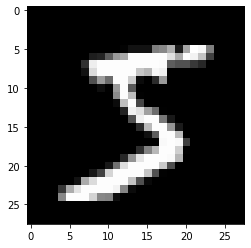

In [4]:
# Let's have a look at the first example from the dataset
plt.imshow(X_train[0].reshape(28,28),cmap='gray')

## Data Preparations

### Train Data Preparation

In [5]:
# Copy the original data
X_train_orig = X_train.copy()
X_test_orig = X_test.copy()

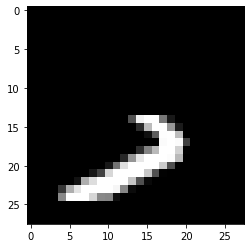

In [6]:
# Set upper half values to 0
X_train[0,0:14,0:28] = 0
# Let's have a look at the first example from the dataset
plt.imshow(X_train[0],cmap='gray')

In [7]:
# Initialize array to store cropped data input
X_train_data = np.zeros(X_train.shape)

In [8]:
for index, image in enumerate(X_train):
  image[0:14,0:28] = 0
  X_train_data[index] = image

### Test Data Preparations

In [9]:
X_test_data = np.zeros(X_test.shape)

In [10]:
for index, image in enumerate(X_test):
  image[0:14,0:28] = 0
  X_test_data[index] = image

## Define Model

In [11]:
class Autoencoder(Model):
  def __init__(self,latent_dimension):
    super(Autoencoder,self).__init__()
    self.latent = latent_dimension
    self.encoder = Sequential(
        [Flatten(),
         Dense(256, activation='relu'),
         Dense(128,'relu'),
         Dense(self.latent, activation='relu')
        ])
    self.decoder = Sequential(
        [Dense(self.latent,activation='relu'),
         Dense(128,'relu'),
         Dense(256, activation='relu'),
         Dense(784,activation='sigmoid'),
         Reshape((28,28))
         ])
    
  def call(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [12]:
# define an instance of the class Autoencoder
autoencoder = Autoencoder(64)

In [13]:
autoencoder.compile(optimizer='adam',loss='mse')

## Train the Model

In [14]:
autoencoder.fit(X_train_data, X_train_orig, epochs=50, shuffle=True)

Epoch 1/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0339
Epoch 2/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0230
Epoch 3/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0212
Epoch 4/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0202
Epoch 5/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0196
Epoch 6/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0192
Epoch 7/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0188
Epoch 8/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0186
Epoch 9/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0184
Epoch 10/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0182
Epoch 11/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0180
Epoch 12/50
1875/1875 [==============================] - 13s 7ms/step - lo

## Encoding and Decoding Test Data

In [17]:
encoded_img_data = autoencoder.encoder(X_test_data).numpy()
decoded_img_data = autoencoder.decoder(encoded_img_data)

## Results

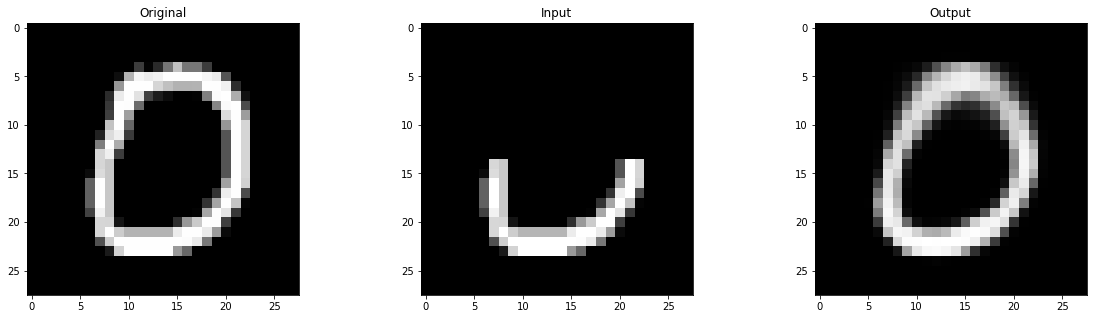

In [25]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.imshow(X_test_orig[10],cmap='gray')
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(X_test_data[10],cmap='gray')
plt.title("Input")

plt.subplot(1,3,3)
plt.imshow(decoded_img_data[10],cmap='gray')
plt.title("Output")

plt.show()